# INTEGRANTES

### Arrieta Palacios Andrés Leonardo - 20200153
### Alfaro Mauricio Kevin Johan - 20200242
### Taipe Javier Luis Angel - 20200118

# **Carga de datos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex=True)
plt.rc('font', family='times')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('font', size=12)
#CARGA
df = pd.read_csv('C:\\Users\\acer\\Pictures\\7mo CICLO\\INTERNET DE LAS COSAS\\iot_telemetry_data.csv',
                  na_values=':')

#ANALISIS EFICIENTE DE LOS DISPOSITIVOS 
df.replace(['b8:27:eb:bf:9d:51', '00:0f:00:70:91:0a', '1c:bf:ce:15:ec:4d'], ['C1','C2','C3'], inplace=True)

#ANALISIS EFICIENTE DE LAS FECHAS
#Convertir float a fecha usando la funcion de Pandas to_datetime() 
df['ts'] = pd.to_datetime(df['ts'], unit='s')
df


,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,2020-07-12 00:01:34.385974528,C1,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,2020-07-12 00:01:34.735567616,C2,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,2020-07-12 00:01:38.073572864,C1,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,2020-07-12 00:01:39.589145856,C3,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,2020-07-12 00:01:41.761234944,C1,0.004967,50.900000,False,0.007664,False,0.020448,22.600000
...,...,...,...,...,...,...,...,...,...
405179,2020-07-20 00:03:33.162014976,C2,0.003745,75.300003,False,0.006247,False,0.016437,19.200001
405180,2020-07-20 00:03:33.576560640,C1,0.005882,48.500000,False,0.008660,False,0.023301,22.200000
405181,2020-07-20 00:03:36.167959296,C3,0.004540,75.699997,True,0.007181,False,0.019076,26.600000
405182,2020-07-20 00:03:36.979521536,C2,0.003745,75.300003,False,0.006247,False,0.016437,19.200001


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   ts        405184 non-null  datetime64[ns]
 1   device    405184 non-null  object        
 2   co        405184 non-null  float64       
 3   humidity  405184 non-null  float64       
 4   light     405184 non-null  bool          
 5   lpg       405184 non-null  float64       
 6   motion    405184 non-null  bool          
 7   smoke     405184 non-null  float64       
 8   temp      405184 non-null  float64       
dtypes: bool(2), datetime64[ns](1), float64(5), object(1)
memory usage: 22.4+ MB


In [3]:
df.isna().sum()

ts          0
device      0
co          0
humidity    0
light       0
lpg         0
motion      0
smoke       0
temp        0
dtype: int64

# 1. Determinar los valores estadísticos de cada columna

In [4]:
valores_estadisticos = df.describe()
print(valores_estadisticos)

                  co       humidity            lpg          smoke  \
count  405184.000000  405184.000000  405184.000000  405184.000000   
mean        0.004639      60.511694       0.007237       0.019264   
std         0.001250      11.366489       0.001444       0.004086   
min         0.001171       1.100000       0.002693       0.006692   
25%         0.003919      51.000000       0.006456       0.017024   
50%         0.004812      54.900000       0.007489       0.019950   
75%         0.005409      74.300003       0.008150       0.021838   
max         0.014420      99.900002       0.016567       0.046590   

                temp  
count  405184.000000  
mean       22.453987  
std         2.698347  
min         0.000000  
25%        19.900000  
50%        22.200000  
75%        23.600000  
max        30.600000  


# 2. Mostrar temperaturas máximas y mínimas 
## a.Temperaturas máximas y mínimas


In [5]:
#Temperatura
temp_maxima = df['temp'].max()
temp_minima = df['temp'].min()

fila_maxima = df.loc[df['temp'].idxmax()]
fila_minima = df.loc[df['temp'].idxmin()]
#Dispositivo
temp_maxima_dispositivo = fila_maxima['device']
temp_minima_dispositivo = fila_minima['device']
#Fecha
temp_maxima_fecha = fila_maxima['ts']
temp_minima_fecha = fila_minima['ts']
#Imprimir
print('-------------------')
print('Temperatura máxima: ',temp_maxima)
print('Dispositivo del máximo: ',temp_maxima_dispositivo)
print('Fecha del máximo: ',temp_maxima_fecha)
print('-------------------')
print('Temperatura mínima: ',temp_minima)
print('Dispositivo del minimo: ',temp_minima_dispositivo)
print('Fecha del minimo: ',temp_minima_fecha)

-------------------
Temperatura máxima:  30.600000381469727
Dispositivo del máximo:  C3
Fecha del máximo:  2020-07-18 20:15:31.089378048
-------------------
Temperatura mínima:  0.0
Dispositivo del minimo:  C2
Fecha del minimo:  2020-07-15 15:50:46.123762944


##  b.Humedad relativa máxima y mínima

In [6]:
hum_maxima = df['humidity'].max()
hum_minima = df['humidity'].min()

fila_maxima = df.loc[df['humidity'].idxmax()]
fila_minima = df.loc[df['humidity'].idxmin()]
#Dispositivo
hum_maxima_dispositivo = fila_maxima['device']
hum_minima_dispositivo = fila_minima['device']
#Fecha
hum_maxima_fecha = fila_maxima['ts']
hum_minima_fecha = fila_minima['ts']
#Imprimir
print('-------------------')
print('Humedad máxima: ',hum_maxima)
print('Dispositivo del máximo: ',hum_maxima_dispositivo)
print('Fecha del máximo: ',hum_maxima_fecha)
print('-------------------')
print('Humedad mínima: ',hum_minima)
print('Dispositivo del minimo: ',hum_minima_dispositivo)
print('Fecha del minimo: ',hum_minima_fecha)

-------------------
Humedad máxima:  99.9000015258789
Dispositivo del máximo:  C2
Fecha del máximo:  2020-07-16 20:12:33.941909504
-------------------
Humedad mínima:  1.100000023841858
Dispositivo del minimo:  C2
Fecha del minimo:  2020-07-19 04:50:55.061562880


## c. Datos de humo usando agrupación de datos en 5 grupos

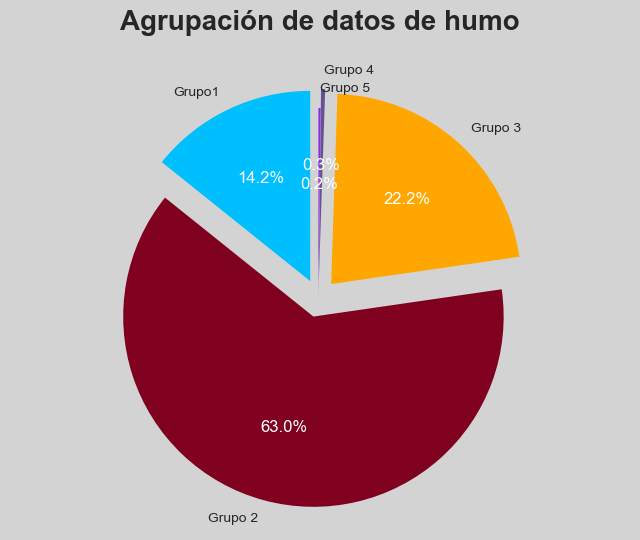

['Grupo1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5']

In [7]:
#Latex
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
# Agrupamos los datos en 5 grupos, con cut se generan los rangos automaticamente
df['grupo'] = pd.cut(df['smoke'], bins=5)
grupo_counts = df.groupby('grupo').size()

labels = ['Grupo1', 'Grupo 2', 'Grupo 3','Grupo 4', 'Grupo 5']
colors = ['#00BFFF', '#800020', '#ffa600','#665191', '#8A2BE2']
explode = (0.1, 0.1, 0.1, 0.1, 0.0)

#Genremos el gráfico de tipo pie
plt.figure(figsize=(8, 6), facecolor='lightgray')
_, _, texts = plt.pie(grupo_counts, labels=labels, autopct='%1.1f%%', startangle=90,
                      explode=explode, colors=colors)

plt.axis('equal')
plt.title('Agrupación de datos de humo\n', fontsize=20, fontweight='bold')
for text in texts:
    text.set_color('white')
plt.show()
labels

# 3. Reporte de temperaturas usando Barras verticales

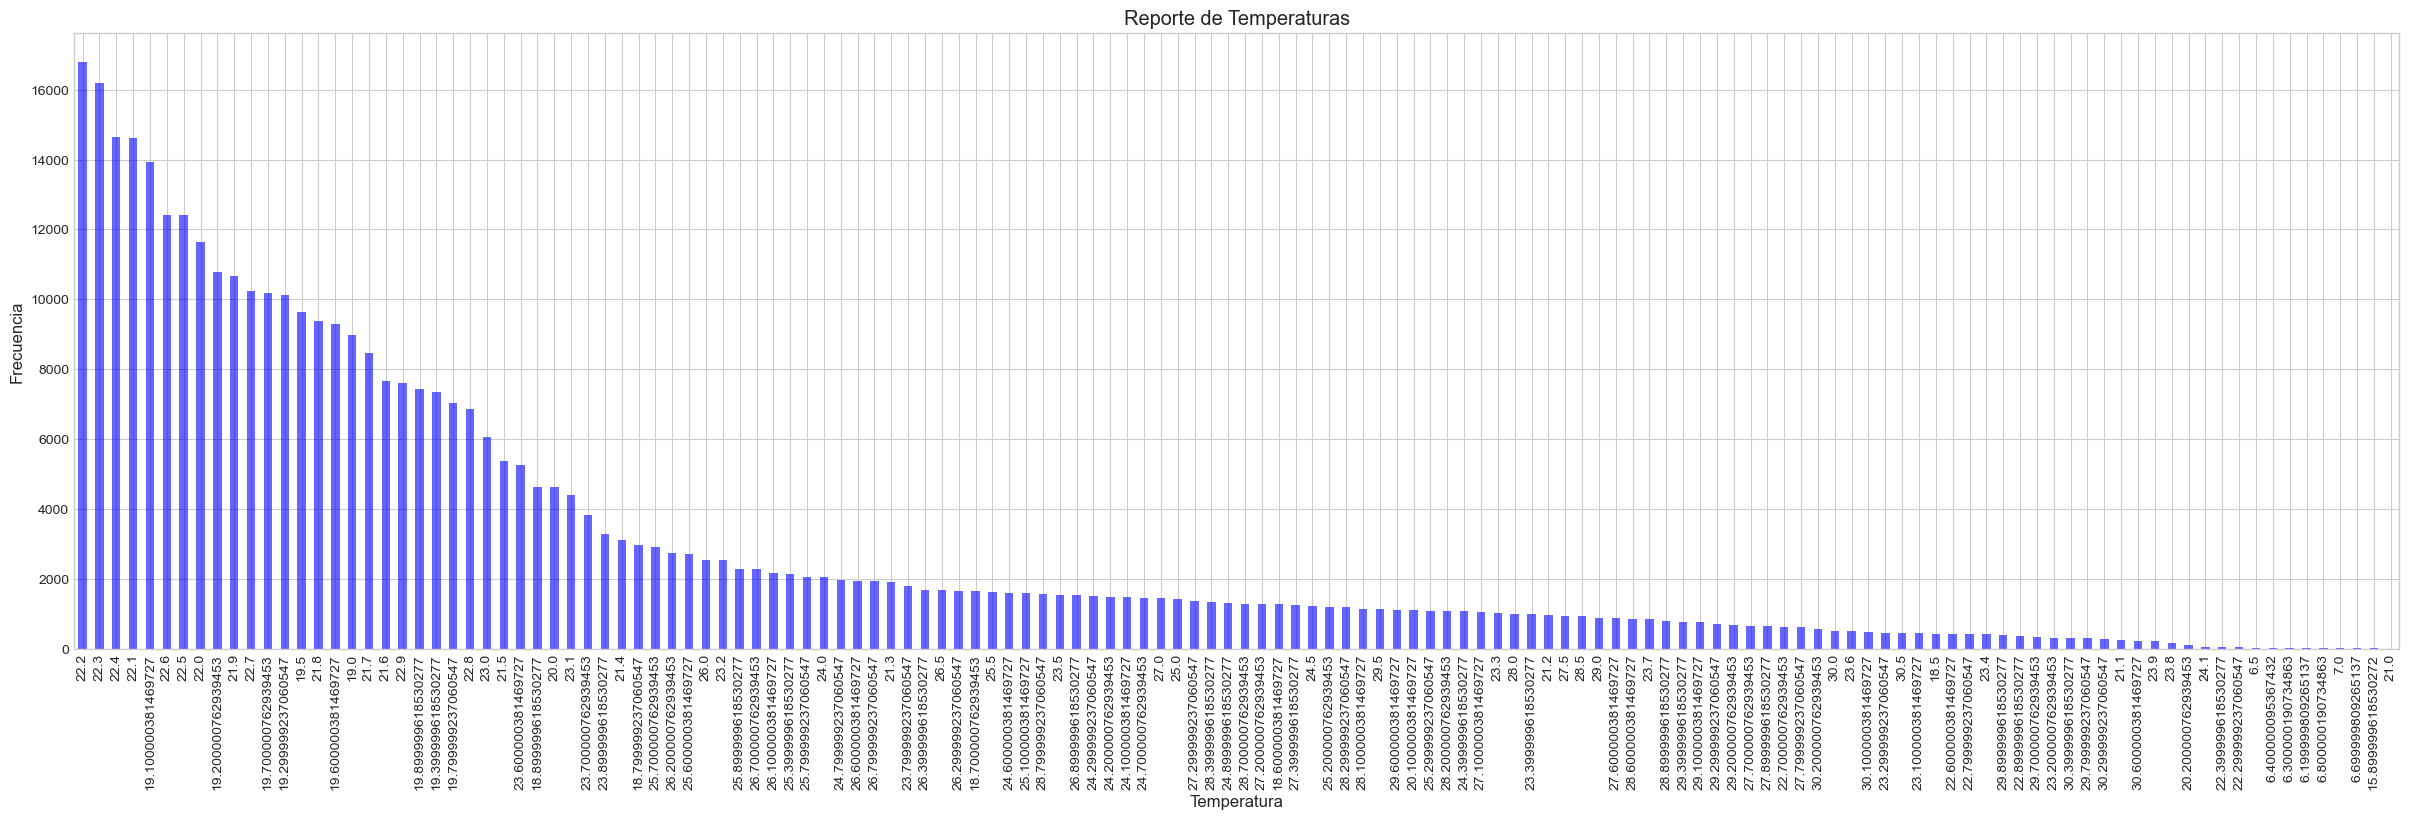

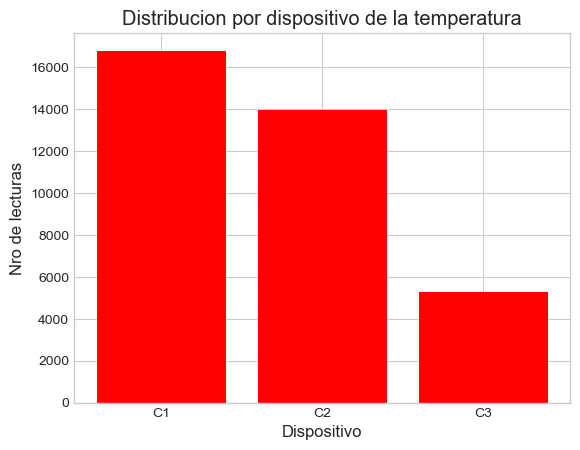

In [8]:
# Obtenemos los valores distintos y su frecuencia
# para reducir la cantidad de datos del reporte
# con esto obtenemos 231 valores de temperatura
temp_valores = df['temp'].value_counts()

# Establecemos un umbral mínimo de frecuencia
# y filtramos los valores que superen el umbral de frecuencia
umbral_frecuencia = 10
temp_valores = temp_valores[temp_valores >= umbral_frecuencia]

# Generamos el gráfico
plt.figure(figsize=(30, 8))
temp_valores.plot(kind='bar',color='b',alpha=0.6)
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.title('Reporte de Temperaturas')
plt.show()


#ALTERNATIVA
agrupacion = df.groupby(['device','temp']).size().reset_index(name='count')

#GRAFICA SEGUN DISPOSITIVO
plt.bar(agrupacion['device'],agrupacion['count'],color='r')
plt.title('Distribucion por dispositivo de la temperatura')
plt.xlabel('Dispositivo')
plt.ylabel('Nro de lecturas')
plt.show()

# 4. Reporte de CO mostrando los mínimos y máximos

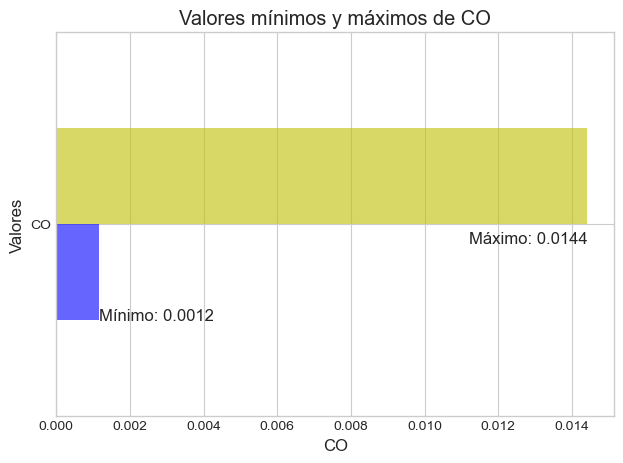

In [9]:
co_minimo = df['co'].min()
co_maximo = df['co'].max()

# Creamos un DataFrame con los valores mínimo y máximo
df_co = pd.DataFrame({'Mínimo': co_minimo, 'Máximo': co_maximo}, index=['CO'])

# Creamos un gráfico de barras para el reporte
ax = df_co.plot(kind='barh', legend=False, color=['b', 'y'], alpha=0.6)
ax.set_xlabel('CO')
ax.set_ylabel('Valores')
ax.set_title('Valores mínimos y máximos de CO')

# Imprimimos los valores mínimo y máximo en el gráfico
ax.text(co_minimo, -0.25, f'Mínimo: {co_minimo:.4f}', ha='left')
ax.text(co_maximo, -0.05, f'Máximo: {co_maximo:.4f}', ha='right')

plt.tight_layout()
plt.show()